In [1]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("ai_financial_market.csv")

In [3]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [4]:
# Show basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [5]:
# Convert datatype of Date column into Date time format

df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Confirm change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


In [7]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [8]:
# Show all company names

df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [9]:
# Create a new column for 'Year' only
df['Year'] = df['Date'].dt.year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
 7   Year                 10959 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), object(2)
memory usage: 642.3+ KB


In [11]:
# Show the years
df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int32)

In [12]:
# Count the number of years
df['Year'].nunique()

10

In [13]:
# Show the various Events with their counts
df['Event'].value_counts()

Event
AI speech recognition release      37
AI Ads Optimization upgrade        32
AI partnership deal                32
AI-powered search update           32
AI Video Recommendation upgrade    29
AI ethics policy update            27
Cloud AI launch                    27
GPT-1 release                       1
GPT-2 release                       1
GPT-3 release                       1
Codex release                       1
DALL·E 2 release                    1
ChatGPT (GPT-3.5) launch            1
GPT-4 release                       1
GPT-5 release (predicted)           1
TensorFlow open-source release      1
AlphaGo beats Lee Sedol             1
BERT for Search launch              1
MUM Search Model launch             1
Bard chatbot launch                 1
Gemini AI release                   1
LLaMA 1 release                     1
LLaMA 2 release                     1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

In [14]:
# Event when GPT-4 was released
df[df['Event'] == 'GPT-4 release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.2,2023


In [15]:
# Check for missing/null values

df.isnull().sum

<bound method DataFrame.sum of         Date  Company  R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
0      False    False                False              False   
1      False    False                False              False   
2      False    False                False              False   
3      False    False                False              False   
4      False    False                False              False   
...      ...      ...                  ...                ...   
10954  False    False                False              False   
10955  False    False                False              False   
10956  False    False                False              False   
10957  False    False                False              False   
10958  False    False                False              False   

       AI_Revenue_Growth_%  Event  Stock_Impact_%   Year  
0                    False   True           False  False  
1                    False   True           False  False  
2          

How much companies spent on R&D

In [16]:
print("Company's spending on R&D in $Bn")

RD = df.groupby('Company')['R&D_Spending_USD_Mn'].sum()/1000
RD

Company's spending on R&D in $Bn


Company
Google    423.34114
Meta      264.53307
OpenAI     26.48277
Name: R&D_Spending_USD_Mn, dtype: float64

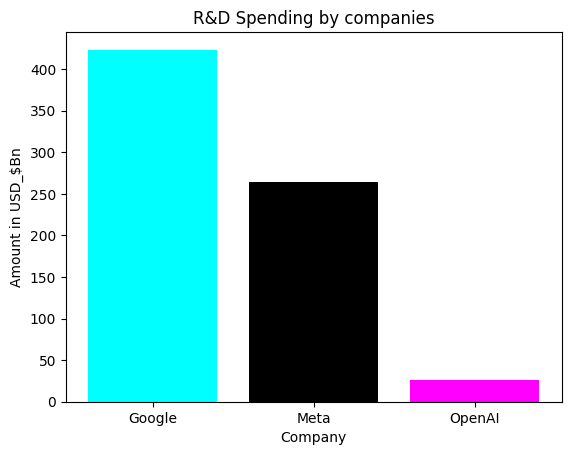

In [17]:
# Visualize each company's spending on R&D

plt.bar(RD.index, RD.values, color = ['cyan', 'black', 'magenta'])

plt.title("R&D Spending by companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")

plt.show()

Revenue Earned by each company

In [18]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [19]:
print("Company's AI_Revenue_USD_Bn :")

rev = df.groupby('Company')['AI_Revenue_USD_Mn'].sum()/1000

rev

Company's AI_Revenue_USD_Bn :


Company
Google    284.49838
Meta      189.62182
OpenAI      9.46289
Name: AI_Revenue_USD_Mn, dtype: float64

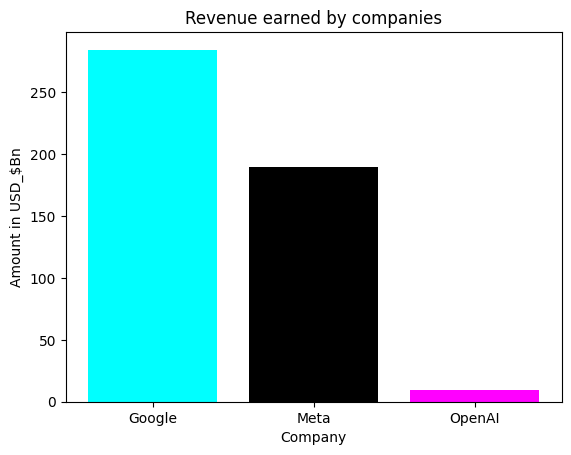

In [20]:
# Visualize each company's revenue

plt.bar(rev.index, rev.values, color = ['cyan', 'black', 'magenta'])

plt.title("Revenue earned by companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")

plt.show()

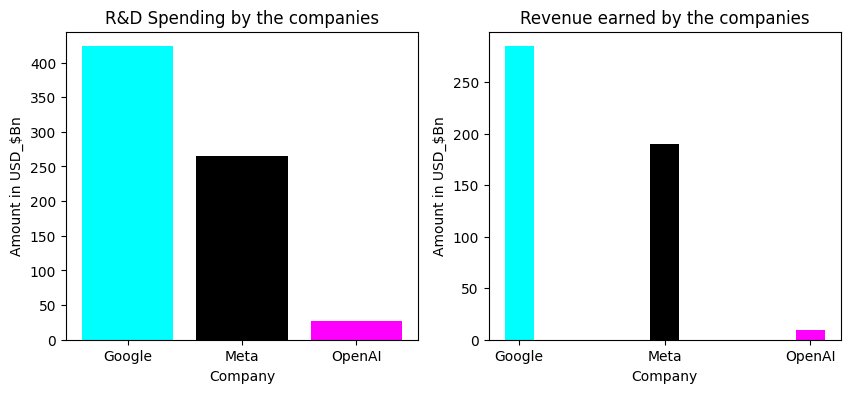

In [21]:
# Bar plots to show expenditure & revenue of the companies

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)

plt.bar(RD.index, RD.values, color = ['cyan', 'black', 'magenta'])

plt.title( "R&D Spending by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")

plt.subplot(1,2,2)

plt.bar(rev.index, rev.values, color = ['cyan', 'black', 'magenta'], width = 0.2)

plt.title( "Revenue earned by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")

plt.show()

Date impact on stock impact

In [22]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


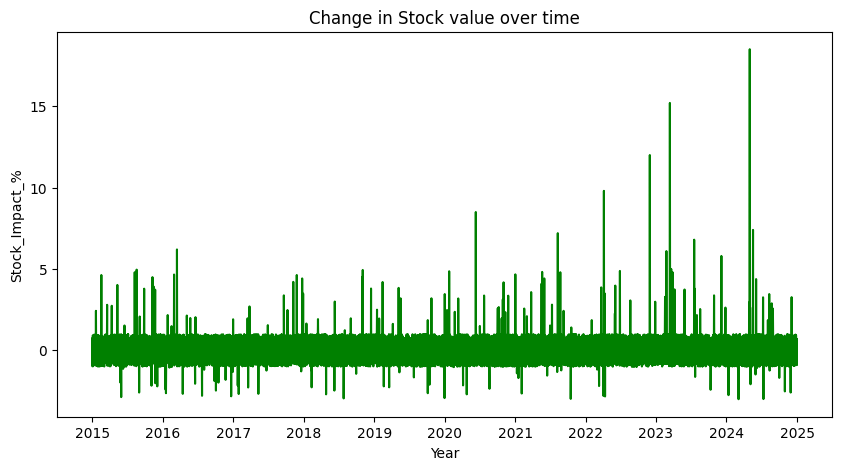

In [23]:
plt.figure(figsize = (10,5))

plt.plot(df['Date'], df['Stock_Impact_%'], color = 'green')

plt.title("Change in Stock value over time")
plt.xlabel("Year")
plt.ylabel("Stock_Impact_%")

plt.show()

Indepth analysis on each comapnies

In [24]:
# Separate dataframes into each respectve companies

data_openai =  df [df['Company'] == 'OpenAI']
data_google = df [df['Company'] == 'Google']
data_meta = df [df['Company'] == 'Meta']


In [25]:
data_openai.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


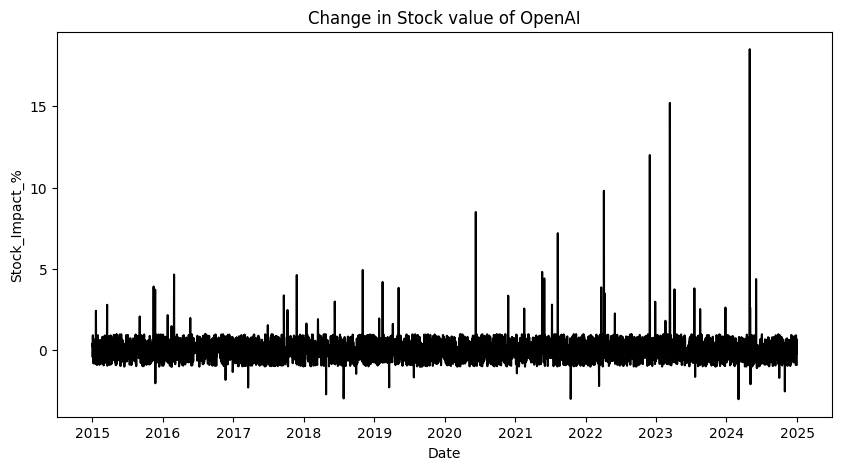

In [26]:
plt.figure(figsize = (10,5))

plt.plot(data_openai['Date'], data_openai['Stock_Impact_%'], color = 'black')

plt.title("Change in Stock value of OpenAI")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")

plt.show()

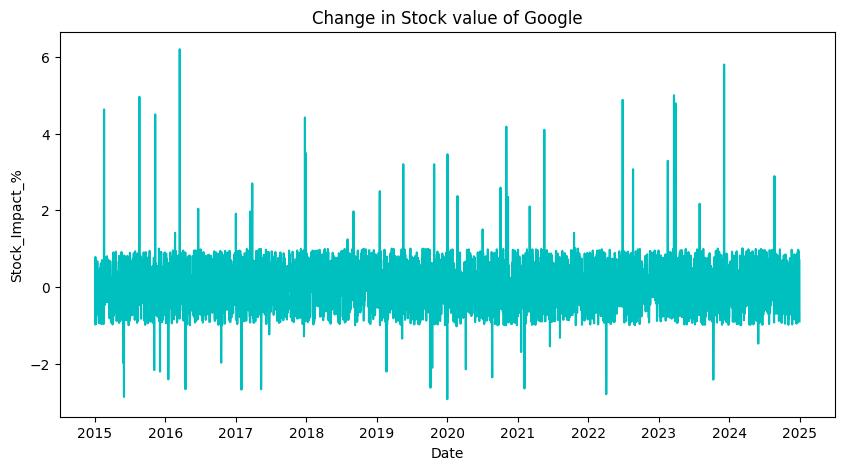

In [27]:
plt.figure(figsize = (10,5))

plt.plot( data_google['Date'], data_google['Stock_Impact_%'], color = 'c')
plt.title("Change in Stock value of Google")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")

plt.show()

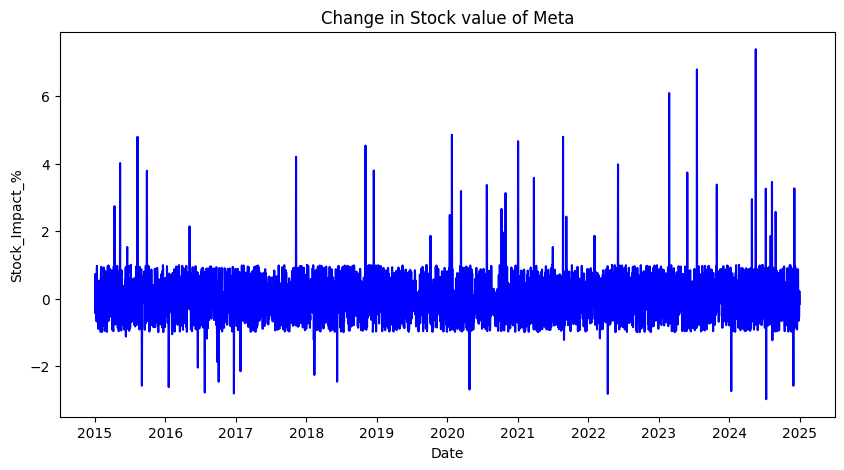

In [28]:
plt.figure(figsize = (10,5))

plt.plot( data_meta['Date'], data_meta['Stock_Impact_%'], color = 'blue' )
plt.title("Change in Stock value of Meta")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")

plt.show()

Events when maximum stock impact was observed

In [29]:
# OpenAI's Events when Maximum Stock Impact was observed

data_openai.sort_values( by = 'Stock_Impact_%', ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50,2024
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20,2023
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00,2022
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80,2022
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50,2020
...,...,...,...,...,...,...,...,...
3590,2024-10-30,OpenAI,11.05,5.27,427.50,AI-powered search update,-2.52,2024
1212,2018-04-27,OpenAI,5.38,1.76,76.47,AI ethics policy update,-2.70,2018
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95,2018
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98,2021


The data suggests that the launch of GPT-5 exerted the strongest influence on stock value compared to other events.

In [30]:
# Google's Events when Maximum Stock Impact was observed

data_google.sort_values( by = 'Stock_Impact_%', ascending = False )

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,2022
...,...,...,...,...,...,...,...,...
4122,2016-04-14,Google,87.19,36.08,20.28,AI partnership deal,-2.67,2016
4412,2017-01-29,Google,92.21,43.25,44.17,AI Ads Optimization upgrade,-2.68,2017
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80,2022
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87,2015


Google’s stock value saw a sharp increase following AlphaGo’s victory over Lee Sedol, with further gains after the launch of Gemini AI.

In [31]:
# Meta's Events when Maximum Stock Impact was observed

data_meta.sort_values(by = 'Stock_Impact_%', ascending = False )

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,2020
7526,2015-08-09,Meta,48.97,19.95,-0.27,AI Video Recommendation upgrade,4.80,2015
...,...,...,...,...,...,...,...,...
10604,2024-01-12,Meta,99.37,104.28,421.42,AI Video Recommendation upgrade,-2.75,2024
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79,2016
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82,2016
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83,2022


In the same way, the launch of LLaMA 3 strongly influenced Meta’s stock performance.

AI Revenue Growth by Company

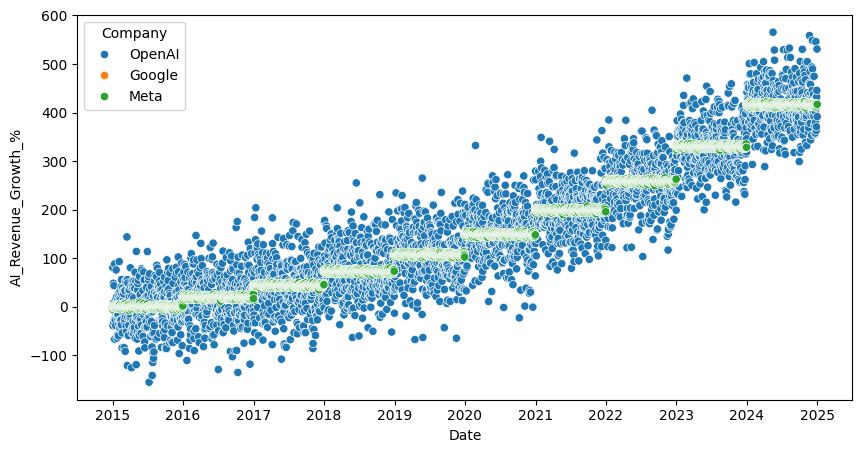

In [32]:
plt.figure(figsize=(10,5))

sns.scatterplot(x = 'Date', y = 'AI_Revenue_Growth_%', data = df, hue = 'Company')

plt.show()

In [33]:
df.sort_values(by = ['AI_Revenue_Growth_%'])

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
189,2015-07-09,OpenAI,5.66,-0.55,-155.43,NaN,0.70,2015
205,2015-07-25,OpenAI,5.23,-0.42,-141.61,NaN,-0.62,2015
649,2016-10-11,OpenAI,5.37,-0.35,-135.31,NaN,0.12,2016
548,2016-07-02,OpenAI,5.19,-0.29,-129.11,NaN,-0.31,2016
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,NaN,-0.56,2015
...,...,...,...,...,...,...,...,...
3508,2024-08-09,OpenAI,9.92,6.33,532.86,NaN,0.77,2024
3645,2024-12-24,OpenAI,8.79,6.46,546.07,NaN,0.45,2024
3627,2024-12-06,OpenAI,8.51,6.49,548.83,NaN,-0.15,2024
3612,2024-11-21,OpenAI,10.16,6.59,558.70,NaN,0.63,2024


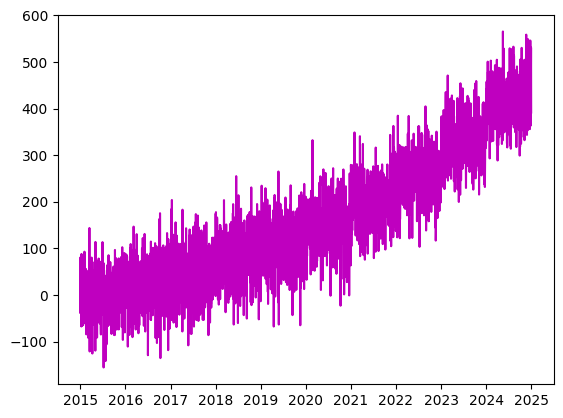

In [34]:
plt.plot( data_openai['Date'], data_openai['AI_Revenue_Growth_%'], color = 'm')

plt.show()

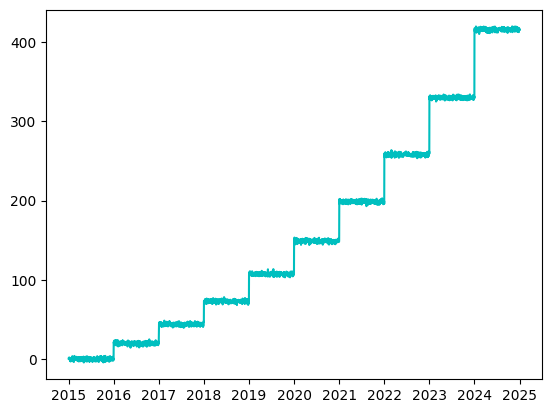

In [35]:
# Google's AI Revenue Growth year-by-year

plt.plot( data_google['Date'], data_google['AI_Revenue_Growth_%'], color = 'c')

plt.show()

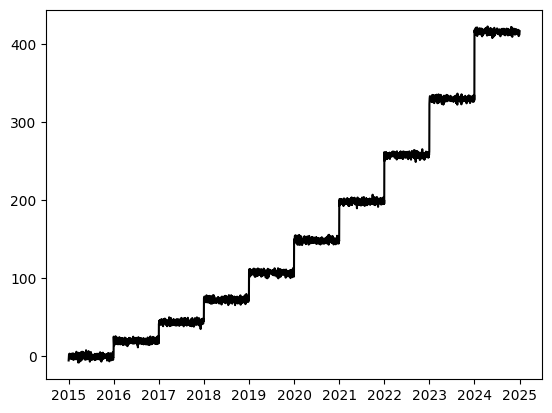

In [36]:
# Meta's AI Revenue Growth year-by-year

plt.plot( data_meta['Date'], data_meta['AI_Revenue_Growth_%'], color = 'black')

plt.show()

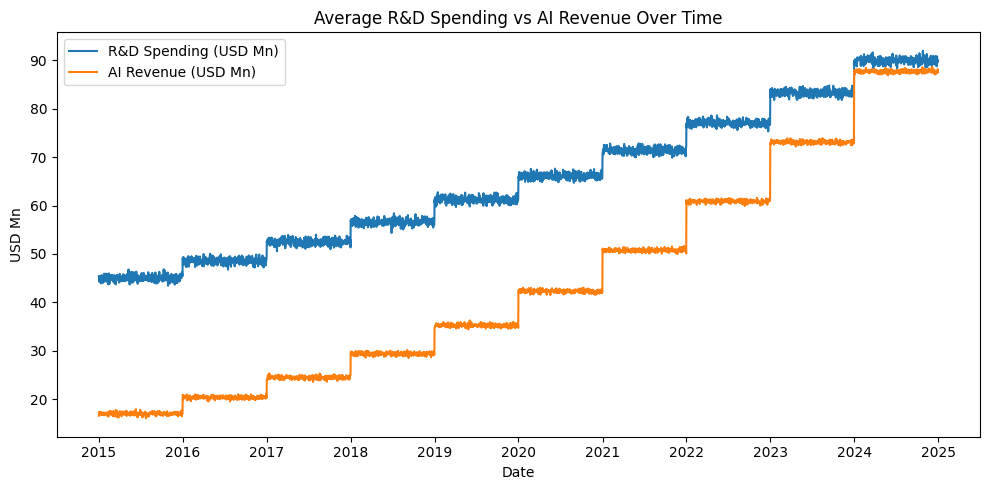

In [37]:
# --- Trends: average over time ---
daily_avg = df.groupby('Date')[['R&D_Spending_USD_Mn','AI_Revenue_USD_Mn','AI_Revenue_Growth_%','Stock_Impact_%']].mean()


# Plot revenue vs R&D over time (averaged)
plt.figure(figsize=(10,5))
plt.plot(daily_avg.index, daily_avg['R&D_Spending_USD_Mn'], label="R&D Spending (USD Mn)")
plt.plot(daily_avg.index, daily_avg['AI_Revenue_USD_Mn'], label="AI Revenue (USD Mn)")
plt.legend()
plt.title("Average R&D Spending vs AI Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("USD Mn")
plt.tight_layout()
plt.show()

nsights from the “Average R&D Spending vs AI Revenue Over Time” plot

Parallel Movement

The two lines generally rise and fall together.

This visual co-movement suggests that increases in R&D spending are followed by increases in AI revenue (and vice versa).

Revenue Response

In some stretches of the plot, revenue seems to lag slightly behind R&D spending.

This makes sense: companies first invest in research, then later see a payoff in revenue.

Industry-Level Growth

Over the years, both lines trend upward → showing that, across the industry, AI has become more lucrative as companies invested more in R&D.

Periods of Divergence

There may be brief windows where R&D rises but revenue doesn’t immediately follow (flat or even declining).

These “gaps” could represent delays in commercialization, failed research bets, or external market pressures.

Correlation

<Axes: >

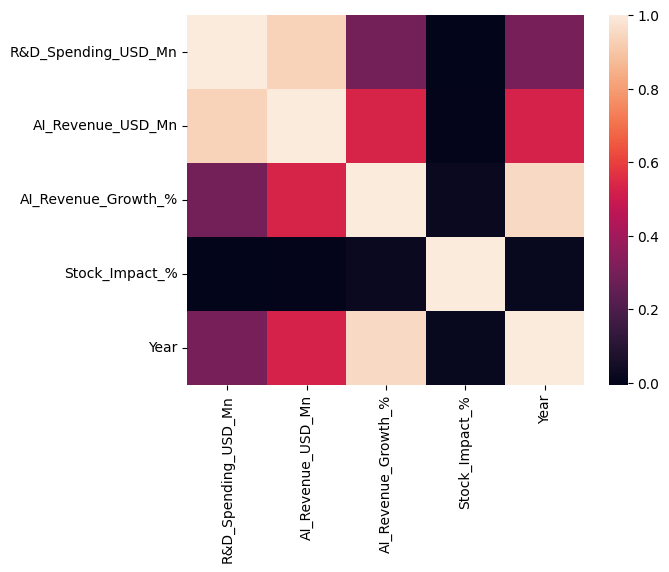

In [38]:
sns.heatmap(df.corr(numeric_only= True))

Key Insights

R&D and Revenue

Strong positive correlation (0.94) between R&D spending and AI revenue.

Revenue growth is moderately correlated with both R&D (0.29) and revenue (0.53).

Stock impact has almost no correlation with financial metrics.

Trends over time (averages across all companies)

R&D spending and AI revenue rise together, showing a clear dependency.

Revenue grows faster after R&D spikes.

Events

Rare in dataset but may explain outliers in stock impact.

Expenditure Vs Revenue by year

In [39]:
spend = df.groupby('Year')['R&D_Spending_USD_Mn'].sum()

spend

Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

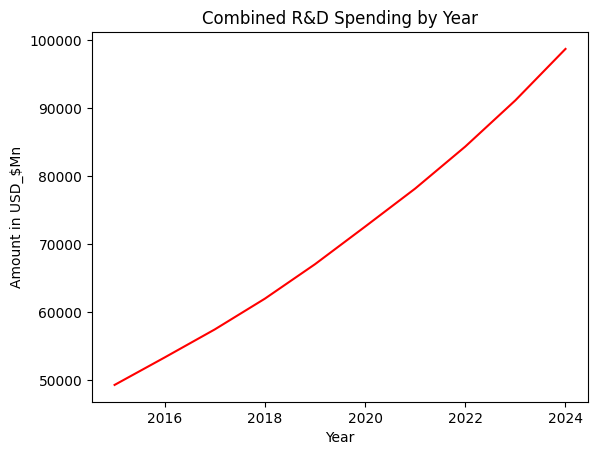

In [40]:
# Visualize amount spent on R&D by year

plt.plot(spend.index, spend.values, color = 'r')

plt.title("Combined R&D Spending by Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")

plt.show()



In [41]:
revenue = df.groupby('Year')['AI_Revenue_USD_Mn'].sum()

revenue

Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

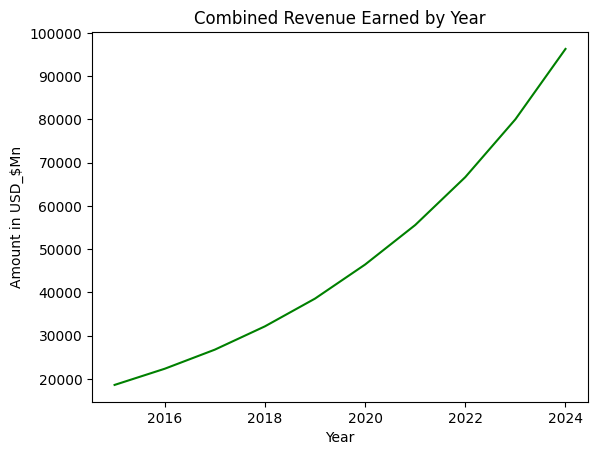

In [42]:
# Visualize combined revenue by year

plt.plot(revenue.index, revenue.values, color= 'g')
plt.title("Combined Revenue Earned by Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

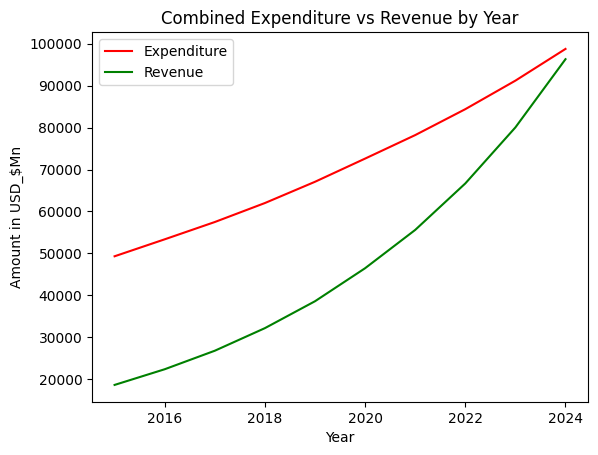

In [43]:
plt.plot(spend.index, spend.values, color = 'r')
plt.plot(revenue.index, revenue.values, color = 'g')

plt.title("Combined Expenditure vs Revenue by Year")

plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")

plt.legend(['Expenditure', 'Revenue'])

plt.show

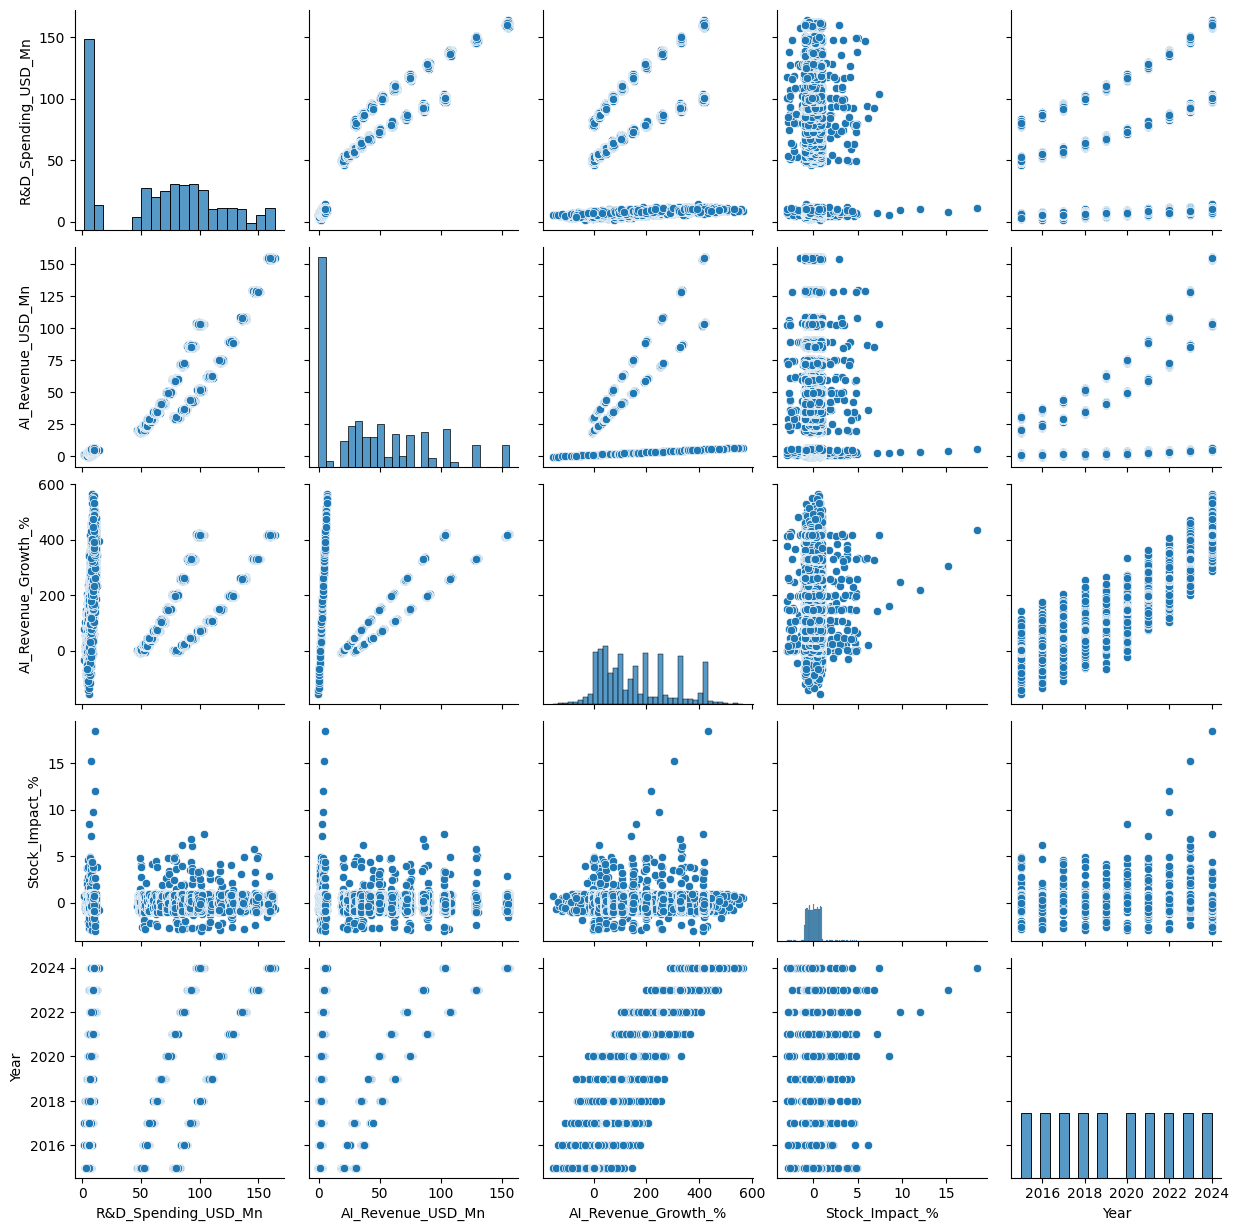

In [44]:
# Pairplot to show the relations between the columns

sns.pairplot(df)

Event Impact Analyis

In [45]:
# Display event count

df.Event.value_counts()

Event
AI speech recognition release      37
AI Ads Optimization upgrade        32
AI partnership deal                32
AI-powered search update           32
AI Video Recommendation upgrade    29
AI ethics policy update            27
Cloud AI launch                    27
GPT-1 release                       1
GPT-2 release                       1
GPT-3 release                       1
Codex release                       1
DALL·E 2 release                    1
ChatGPT (GPT-3.5) launch            1
GPT-4 release                       1
GPT-5 release (predicted)           1
TensorFlow open-source release      1
AlphaGo beats Lee Sedol             1
BERT for Search launch              1
MUM Search Model launch             1
Bard chatbot launch                 1
Gemini AI release                   1
LLaMA 1 release                     1
LLaMA 2 release                     1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

In [46]:
# Checking for a particular event

df[ df.Event == 'AlphaGo beats Lee Sedol']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.2,2016


In [47]:
ag = df.loc[ 4082 : 4102 ]

ag

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4082,2016-03-05,Google,85.94,35.54,18.46,NaN,0.81,2016
4083,2016-03-06,Google,87.18,36.41,21.36,NaN,0.44,2016
4084,2016-03-07,Google,86.24,35.36,17.87,NaN,0.35,2016
4085,2016-03-08,Google,88.09,35.78,19.26,NaN,-0.02,2016
4086,2016-03-09,Google,88.11,35.48,18.27,NaN,0.12,2016
4087,2016-03-10,Google,84.06,35.19,17.31,NaN,-0.08,2016
4088,2016-03-11,Google,84.52,36.46,21.53,NaN,0.83,2016
4089,2016-03-12,Google,86.44,36.94,23.15,NaN,0.20,2016
4090,2016-03-13,Google,85.71,35.99,19.98,NaN,-0.09,2016
4091,2016-03-14,Google,86.28,37.08,23.60,NaN,-0.83,2016


/tmp/ipykernel_3459/3446186114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ag['Date'] = pd.to_datetime(ag['Date'])


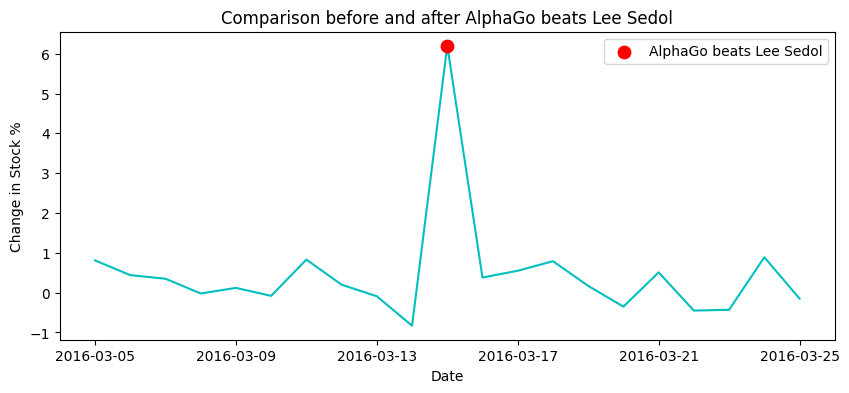

In [48]:
# Make sure Date column is datetime
ag['Date'] = pd.to_datetime(ag['Date'])

# Choose the event date (AlphaGo beats Lee Sedol)
event_date = pd.to_datetime("2016-03-15")

# Find the y-value at that date
event_value = ag.loc[ag['Date'] == event_date, 'Stock_Impact_%'].values[0]

# Plot
plt.figure(figsize=(10,4))
plt.plot(ag['Date'], ag['Stock_Impact_%'], color='c')
plt.title("Comparison before and after AlphaGo beats Lee Sedol")
plt.xlabel("Date")
plt.ylabel("Change in Stock %")

# Highlight the point
plt.scatter(event_date, event_value, color='red', s=80, zorder=5, label="AlphaGo beats Lee Sedol")


plt.legend()
plt.show()


Let's consider the release of GPT-5 

In [49]:
df[df.Event == "GPT-5 release (predicted)"]


,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.5,2024


In [50]:
gp = df.loc[3398 : 3418]

/tmp/ipykernel_3459/4197425084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp['Date'] = pd.to_datetime(gp['Date'])


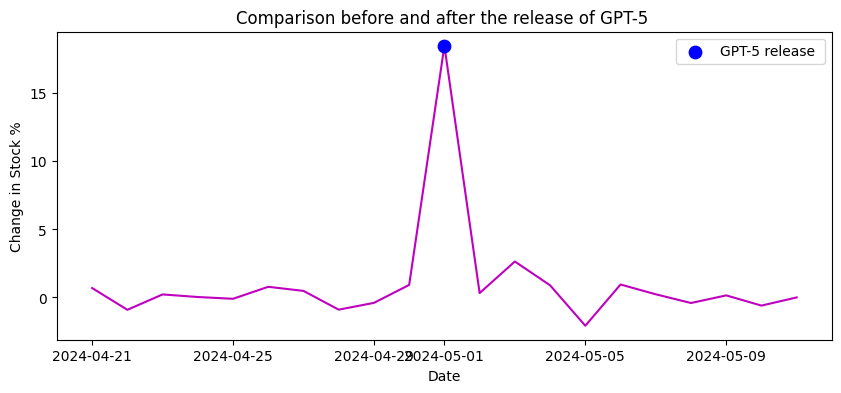

In [51]:

gp['Date'] = pd.to_datetime(gp['Date'])


event_date = pd.to_datetime("2024-05-01")

# Find the y-value at that date
event_value = gp.loc[gp['Date'] == event_date, 'Stock_Impact_%'].values[0]

# Plot
plt.figure(figsize=(10,4))
plt.plot(gp['Date'], gp['Stock_Impact_%'], color='m')
plt.title("Comparison before and after the release of GPT-5 ")
plt.xlabel("Date")
plt.ylabel("Change in Stock %")

# Highlight the point
plt.scatter(event_date, event_value, color='b', s=80, zorder=5, label="GPT-5 release ")


plt.legend()
plt.show()

In [52]:
# Daily Average impact on the Stocks of the companies

df.groupby('Company')['Stock_Impact_%'].mean()*100

Company
Google    2.620860
Meta      0.976184
OpenAI    4.070901
Name: Stock_Impact_%, dtype: float64

In [53]:
# Daily Average Expenditure on R & D by the companies

df.groupby('Company')['R&D_Spending_USD_Mn'].mean()

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

In [54]:
# Maximum impact % on a company's stocks

df.groupby('Company')['Stock_Impact_%'].max()

Company
Google     6.2
Meta       7.4
OpenAI    18.5
Name: Stock_Impact_%, dtype: float64

Change in the index wrt Year & Company

In [55]:
# Highest change in the index

stocks = df.groupby(['Year', 'Company'])['Stock_Impact_%'].max()

stocks

Year  Company
2015  Google      4.96
      Meta        4.80
      OpenAI      3.92
2016  Google      6.20
      Meta        2.14
      OpenAI      4.66
2017  Google      4.42
      Meta        4.21
      OpenAI      4.63
2018  Google      1.97
      Meta        4.54
      OpenAI      4.94
2019  Google      3.20
      Meta        1.86
      OpenAI      4.20
2020  Google      4.18
      Meta        4.86
      OpenAI      8.50
2021  Google      4.10
      Meta        4.80
      OpenAI      7.20
2022  Google      4.88
      Meta        3.98
      OpenAI     12.00
2023  Google      5.80
      Meta        6.80
      OpenAI     15.20
2024  Google      2.89
      Meta        7.40
      OpenAI     18.50
Name: Stock_Impact_%, dtype: float64

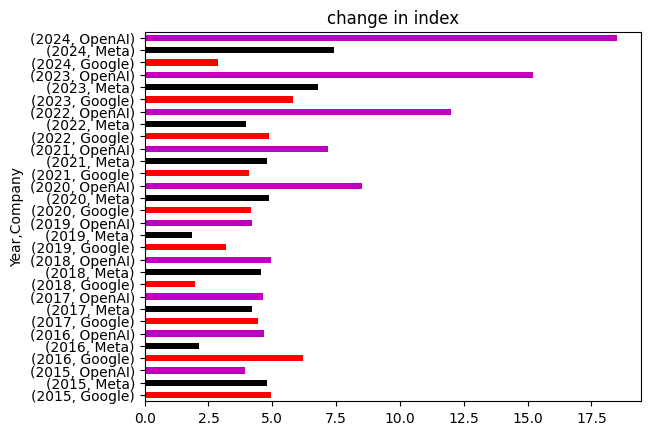

In [56]:
stocks.plot(kind = 'barh', color = ['r', 'black', 'm'])

plt.title("change in index")

plt.show()